In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'iris.csv')
data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [3]:
data.drop(['variety'], axis=1, inplace=True)
data.drop_duplicates(inplace=True)

In [4]:
class KNN:
    """
    This algorithm is used for regression prediction. Based on the first three feature attributes, the nearest neighbor is sought, and then the fourth feature value of the current sample is predicted based on the fourth feature attribute of k neighbors.
    """
    def __init__(self, k):
        """
        :param k: number of neighbors
        """
        self.k = k
    def fit(self, X, y):
        """
        Training Method
        :param X: Sample characteristics to be trained, [samples_num, features_num]
        :param y: Target value for each sample (label), [samples_num]
        """
        self.X = np.asarray(X)
        self.y = np.asarray(y)
    def predict(self, X):
        """
        Use the samples passed by parameters to predict
        :param X: Sample characteristics to be predicted, [samples_num, features_num]
        :return:
        """
        X = np.asarray(X)
        result = []
        for x in X:
            dis = np.sqrt(np.sum((x-self.X)**2, axis = 1))
            idx = dis.argsort()
            idx = idx[:self.k]
            result.append(np.mean(self.y[idx]))
        return np.asarray(result)

In [5]:
t = data.sample(len(data), random_state=0)
train_X = t.iloc[:120, :-1]
train_y = t.iloc[:120, -1]
test_X = t.iloc[120:, :-1]
test_y = t.iloc[120:, -1]
knn = KNN(k=3)
knn.fit(train_X, train_y)
result = knn.predict(test_X)
display(result)

array([0.2       , 2.06666667, 0.2       , 1.93333333, 1.26666667,
       1.2       , 1.23333333, 2.        , 1.13333333, 1.93333333,
       2.03333333, 1.83333333, 1.83333333, 0.2       , 1.16666667,
       2.26666667, 1.63333333, 0.3       , 1.46666667, 1.26666667,
       1.66666667, 1.33333333, 0.26666667, 0.23333333, 0.2       ,
       2.03333333, 1.26666667, 2.2       , 0.23333333])

In [6]:
np.mean(np.sum(result-test_y)**2)
display(test_y)

29     0.2
129    1.6
49     0.2
135    2.3
99     1.3
82     1.2
64     1.3
149    1.8
79     1.0
115    2.3
145    2.3
72     1.5
77     1.7
25     0.2
81     1.0
139    2.1
141    2.3
39     0.2
58     1.3
88     1.3
70     1.8
87     1.3
36     0.2
21     0.4
9      0.1
103    1.8
67     1.0
117    2.2
47     0.2
Name: petal.width, dtype: float64

Text(0.5, 1.0, 'KNN Predict')

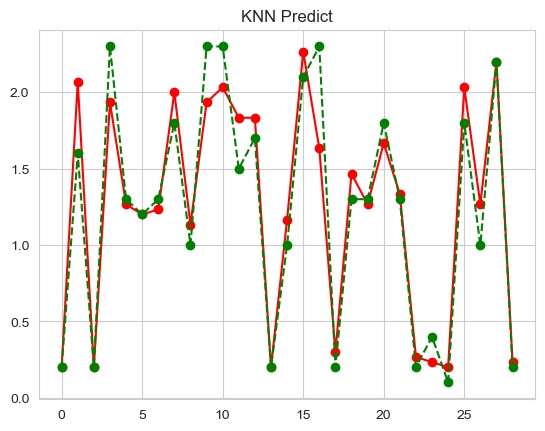

In [7]:
plt.plot(result, 'ro-')
plt.plot(test_y.values, 'go--')
plt.title('KNN Predict')